In this notebook I describe how to decompose matrices.

# Randomly parameterized circuits (RPC)

We start with a statement:

**Any rotation in the (01) or (12) subspace can be thought of as a SU(2) operator embedded in a SU(3) matrix.**

In the matrix represtation, this is 

\begin{align}
R^{01}(\theta, \phi, \lambda) = 
\begin{pmatrix}
\cos(\theta/2) & -ie^{i\lambda}\sin(\theta/2) & 0 \\
-ie^{i\lambda}\sin(\theta/2) & e^{i(\lambda+\phi)}\cos(\theta/2) & 0 \newline
0 & 0 & 1
\end{pmatrix}\\
R^{12}(\theta, \phi, \lambda) = 
\begin{pmatrix}
1 & 0 & 0 \\
0 & \cos(\theta/2) & -ie^{i\lambda}\sin(\theta/2) \\
0 & -ie^{i\lambda}\sin(\theta/2) & e^{i(\lambda+\phi)}\cos(\theta/2)
\end{pmatrix}
\end{align}

Where the embedded $2x2$ SU(2) rotation can be further decomposed into 

\begin{align}
U^{(s)}(\theta, \phi, \lambda) = Z^{(s)}_{\phi-\pi/2}X^{(s)}_{\pi/2}Z^{(s)}_{\pi-\theta}X^{(s)}_{\pi/2}Z^{(s)}_{\lambda-\pi/2}
\end{align}

Here the subscripts $(s)$ denote the corresponding subspace. In doing so we've assumed two things.

1. Sending MW-pulses at the $(s)$ transition frequency will generate *physical pulses* $X_{\pi/2}^{(s)}$
2. Phase-offsetting a physical pulse in subspace $(s)$ will result in sandwiching $Z$ rotations in such subspace. 

Now. Before we go any further, let us now make sure that we're talking about the same $Z$ rotation. 

### In (01) subspace

A $Z$ rotation in (01) subspace is defined as 

\begin{align}
Z^{01}(\varphi) = \begin{pmatrix}
e^{-i\varphi} & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 
\end{pmatrix}
\end{align}

Now, we'd like to make a connection between $Z^{01}$ and $U^{01}$. The connection is, look no further, 

\begin{align}
U^{01}(\theta, \phi, \lambda) = Z^{01}_{\phi-\pi/2}X^{01}_{\pi/2}Z^{01}_{\pi-\theta}X^{01}_{\pi/2}Z^{01}_{\lambda-\pi/2}
\end{align}

In [8]:
import numpy as np

cos = np.cos
sin = np.sin
exp = np.exp
pi = np.pi
sqrt = np.sqrt

def dagger(qobj):
    return qobj.T.conjugate()

In [9]:
def Z01(varphi):
    return np.array([
        [exp(-1j*varphi), 0, 0],
        [0, 1, 0],
        [0, 0, 1]
    ])

def X01(theta):
    return np.array([
        [cos(theta/2), -1j*sin(theta/2), 0],
        [-1j*sin(theta/2), cos(theta/2), 0],
        [0, 0, 1]
    ])

def R01(theta, phi):
    return np.array([
        [cos(theta/2), -1j*exp(-1j*phi)*sin(theta/2), 0],
        [-1j*exp(1j*phi)*sin(theta/2), cos(theta/2), 0],
        [0, 0, 1]
    ])

def R12(theta, phi):
    return np.array([
        [1, 0, 0],
        [0, cos(theta/2), -1j*exp(-1j*phi)*sin(theta/2)],
        [0, -1j*exp(1j*phi)*sin(theta/2), cos(theta/2)],
    ])

def ket0():
    return np.array([
        [1], [0], [0]
    ])

def ket1():
    return np.array([
        [0], [1], [0]
    ])

def ket2():
    return np.array([
        [0], [0], [1]
    ])

In [11]:
dagger(R01(pi/2,pi/4)) @ R01(pi/2,pi/4)

array([[ 1.00000000e+00+0.j, -2.29934717e-17+0.j,  0.00000000e+00+0.j],
       [-2.29934717e-17+0.j,  1.00000000e+00+0.j,  0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  1.00000000e+00+0.j]])

In [37]:
def BerryPhase(phi, varphi_list):
    
    pop = []
    
    for varphi in varphi_list:
        state = ket0()
        state = R01(0, pi/2) @ state
        state = R12(0, pi) @ state
        state = R12(phi, pi) @ state
        state = R01(varphi, -pi/2) @ state
        pop0 = abs(dagger(ket0()) @ state)[0][0]**2
        pop1 = abs(dagger(ket1()) @ state)[0][0]**2
        pop2 = abs(dagger(ket2()) @ state)[0][0]**2
        pop.append([pop0, pop1, pop2])
        
    return pop

In [45]:
R01(varphi, -pi/2) @ R01(phi, pi) @ R12(0, pi) @ R01(0, pi/2) 

array([[ 0.85355339+0.14644661j,  0.35355339+0.35355339j,
         0.        +0.j        ],
       [-0.35355339+0.35355339j,  0.85355339-0.14644661j,
         0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         1.        +0.j        ]])

In [42]:
phi = pi/4

varphi_list = np.linspace(-3*pi/2, 3*pi/2, 100)

pop = BerryPhase(phi, varphi_list)

In [43]:
pop = np.array(pop)

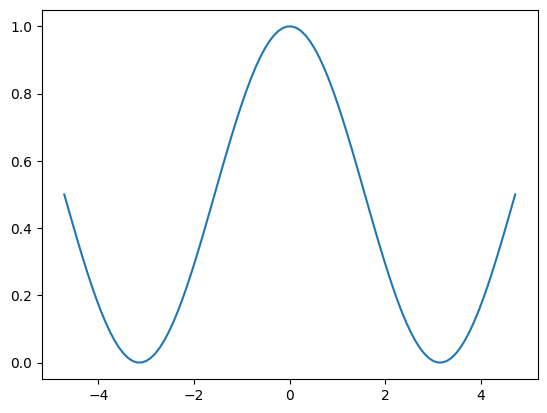

In [44]:
import matplotlib.pyplot as plt 

plt.plot(varphi_list, pop[:, 0])

In [20]:
abs(dagger(ket0()) @ state)[0][0]**2

0.8535533905932737

In [21]:
abs(dagger(ket1()) @ state)[0][0]**2

0.14644660940672624

In [22]:
0.8535533905932737 + 0.14644660940672624

1.0

Now. Let us see if the relationship holds.

\begin{align}
U^{01}(\theta, \phi, \lambda) = Z^{01}_{\phi-\pi/2}X^{01}_{\pi/2}Z^{01}_{\pi-\theta}X^{01}_{\pi/2}Z^{01}_{\lambda-\pi/2}
\end{align}

In [136]:
import numpy as np

theta_num_arr = np.random.uniform(0, np.pi, 10)
phi_num_arr = np.random.uniform(0, np.pi, 10)
lambda_num_arr = np.random.uniform(0, np.pi, 10)

In [137]:
initial_state = X01(pi/2) @ ket0()

In [138]:
for i in range(10):
    theta = theta_num_arr[i]
    phi = phi_num_arr[i]
    lambda_p = lambda_num_arr[i]

    state = R01(theta, phi, lambda_p) @ initial_state

    print((dagger(state) @ state)[0])

[1.-4.28734179e-18j]
[1.+1.47653953e-17j]
[1.+1.64504578e-17j]
[1.-1.54093023e-17j]
[1.+3.8434006e-18j]
[1.-9.67236411e-18j]
[1.-1.56344483e-18j]
[1.+1.6147303e-18j]
[1.+1.39492954e-17j]
[1.+1.23789417e-17j]


In [139]:
for i in range(10):
    theta = theta_num_arr[i]
    phi = phi_num_arr[i]
    lambda_p = lambda_num_arr[i]

    state = Z01(phi-pi/2)@X01(pi/2)@Z01(pi-theta)*X01(pi/2)@Z01(lambda_p-pi/2)@initial_state

    print((dagger(state) @ state)[0])

[0.11538079+4.15327603e-19j]
[0.03226377-2.21185239e-19j]
[0.09090884-3.33560043e-20j]
[0.42872342+3.9384408e-18j]
[0.72443307+2.28910742e-18j]
[0.00705476-2.90766084e-20j]
[0.71756202+1.67678227e-18j]
[0.00060781+4.91442874e-21j]
[0.0657165-1.9252144e-19j]
[0.31206932-4.77623563e-18j]


In [142]:
for i in range(10):
    theta = theta_num_arr[i]
    phi = phi_num_arr[i]
    lambda_p = lambda_num_arr[i]

    state = Z01(phi-pi/2)@X01(pi/2)@Z01(pi-theta)*X01(pi/2)@Z01(lambda_p-pi/2)@initial_state

    print((dagger(state) @ state)[0])

[0.11538079+4.15327603e-19j]
[0.03226377-2.21185239e-19j]
[0.09090884-3.33560043e-20j]
[0.42872342+3.9384408e-18j]
[0.72443307+2.28910742e-18j]
[0.00705476-2.90766084e-20j]
[0.71756202+1.67678227e-18j]
[0.00060781+4.91442874e-21j]
[0.0657165-1.9252144e-19j]
[0.31206932-4.77623563e-18j]


In [141]:
for i in range(10):
    theta = theta_num_arr[i]
    phi = phi_num_arr[i]
    lambda_p = lambda_num_arr[i]

    state = Z01(lambda_p-pi/2)@X01(pi/2)@Z01(pi-theta)@X01(pi/2)@Z01(phi-pi/2)@initial_state

    print((dagger(state) @ state)[0])

[1.-4.231942e-19j]
[1.-3.72702583e-19j]
[1.-5.14557141e-18j]
[1.+1.23829641e-18j]
[1.-4.37878881e-18j]
[1.-1.56919715e-17j]
[1.-1.7041105e-17j]
[1.-4.16522333e-18j]
[1.-1.07344102e-17j]
[1.+2.51985149e-18j]
